# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 2:**

*   "Unidades 4 y 5"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 4 y 5 en dos problemas reales asociados uno al comportamiento financiero de 1000 empresas y otro a un juego de cartas.

## Actividades

1. Descargar el conjunto de datos, 1000_Companies.csv, para realizar el trabajo práctico.
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

2. Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión) analizando los parámetros máximo profundidad, número mínimo de observaciones, número mínimo de observaciones por separación y criterio de separación. Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

3. Descargar el conjunto de datos, PokemonDB.csv, para realizar el trabajo práctico.
Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

4. Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación) analizando los parámetros máximo profundidad, número mínimo de observaciones, número mínimo de observaciones por separación y criterio de separación. Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

5. Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá considerar un criterio de división de los atributos para discretizarlos. Mostrar los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

6. Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros  cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de test (Precisión, Exhaustividad y Exactitud).


# Desarrollo del TP

In [1]:
#@title Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import export_text

# from sklearn.cluster import KMeans

In [2]:
#@title Sincronización con Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title DataFrame

# Path 1 - Referenciado a la carpeta de Drive
data = pd.read_csv('/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP2/1000_Companies.csv', sep=',', engine='python')

# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('1000_Companies.csv', sep=',', engine='python')

In [4]:
data.head(10)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Análisis exploratorio

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Análisis de datos nulos o faltantes

In [6]:
data.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

Se observa que no existen valores nulos ni faltantes.

### Resumen estadístico

In [7]:
data.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


### Recategorización del atributo "State".

In [8]:
data["State"].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [9]:
# Se convierte el tipo de "State" a categoría.
state_maping = {"California": -1, "Florida": 0, "New York": 1}
data["State"] = data["State"].replace(state_maping)

In [10]:
data["State"].value_counts()

-1    344
 1    334
 0    322
Name: State, dtype: int64

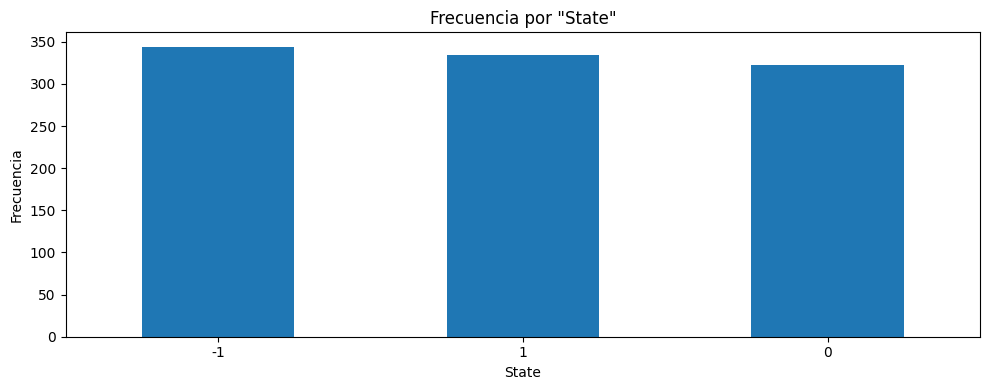

In [11]:
#@title Balance de los datos en "State"

plt.figure(figsize=(10, 4))
data['State'].value_counts().plot(kind='bar')
plt.title('Frecuencia por "State"')
plt.xlabel('State')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

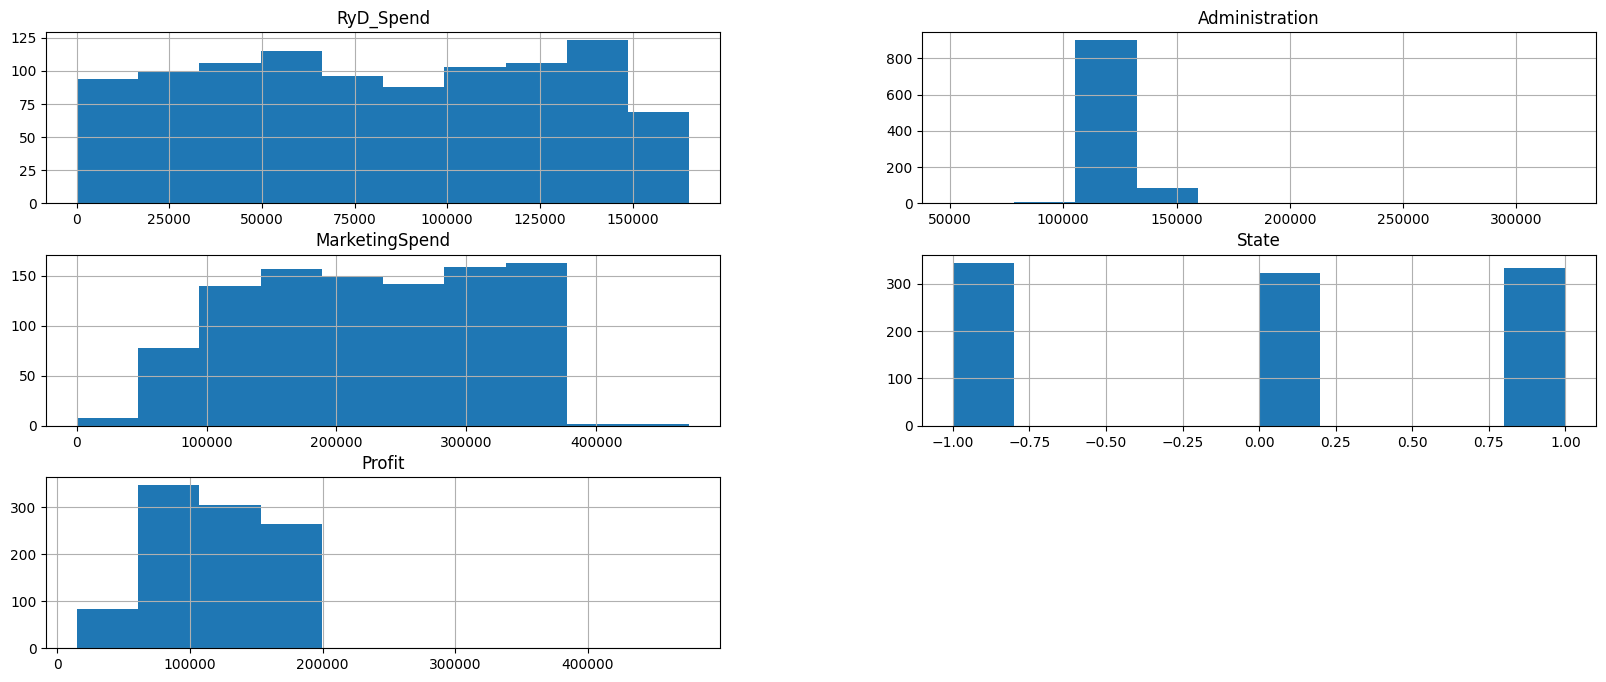

In [12]:
#@title Histogramas
data.hist(figsize=(20,8))
plt.show()

In [13]:
data.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

### Análisis de datos por estado

In [14]:
data_cal = data[data['State'] == -1].copy()
data_flo = data[data['State'] == 0].copy()
data_ny = data[data['State'] == 1].copy()

In [15]:
data_cal.describe()

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,344.000000,344.000000,344.000000,344.0,344.000000
mean,80804.369651,123325.165007,223944.253456,-1.0,119366.449481
std,45964.401914,15419.992170,90187.181320,0.0,44092.902626
min,0.000000,51283.140000,0.000000,-1.0,14681.400000
25%,43577.000000,116892.745450,152179.382850,-1.0,86260.354215
50%,78851.500000,122322.515800,221807.900750,-1.0,117340.755750
75%,122952.000000,128964.074900,302315.919850,-1.0,154069.731800
max,162597.700000,321652.140000,443898.530000,-1.0,413956.480000


In [16]:
data_flo.describe()

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,322.000000,322.000000,322.000000,322.0,322.000000
mean,83677.876584,122784.720553,231368.018870,0.0,120556.909766
std,46370.887314,8665.182769,89896.246962,0.0,39583.529017
min,1315.460000,84710.770000,72022.533270,0.0,49490.750000
25%,45859.250000,116625.251825,157264.587275,0.0,88622.042710
50%,83966.500000,122851.817250,232027.512000,0.0,120764.755550
75%,127911.000000,129396.273675,315583.663000,0.0,158151.535975
max,159570.000000,182645.560000,407934.540000,0.0,191050.390000


In [17]:
data_ny.describe()

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,334.000000,334.000000,334.000000,334.0,334.000000
mean,80622.598144,122764.553387,223556.087288,1.0,118756.829609
std,47355.242837,12642.451525,94623.532875,0.0,44762.686802
min,542.050000,51743.150000,0.000000,1.0,35673.410000
25%,40455.750000,116291.300075,142823.224075,1.0,83593.897270
50%,78325.235000,122204.589700,220216.061000,1.0,114935.925500
75%,123253.500000,129015.949100,307586.838925,1.0,154327.300650
max,165349.200000,270939.860000,471784.100000,1.0,476485.430000


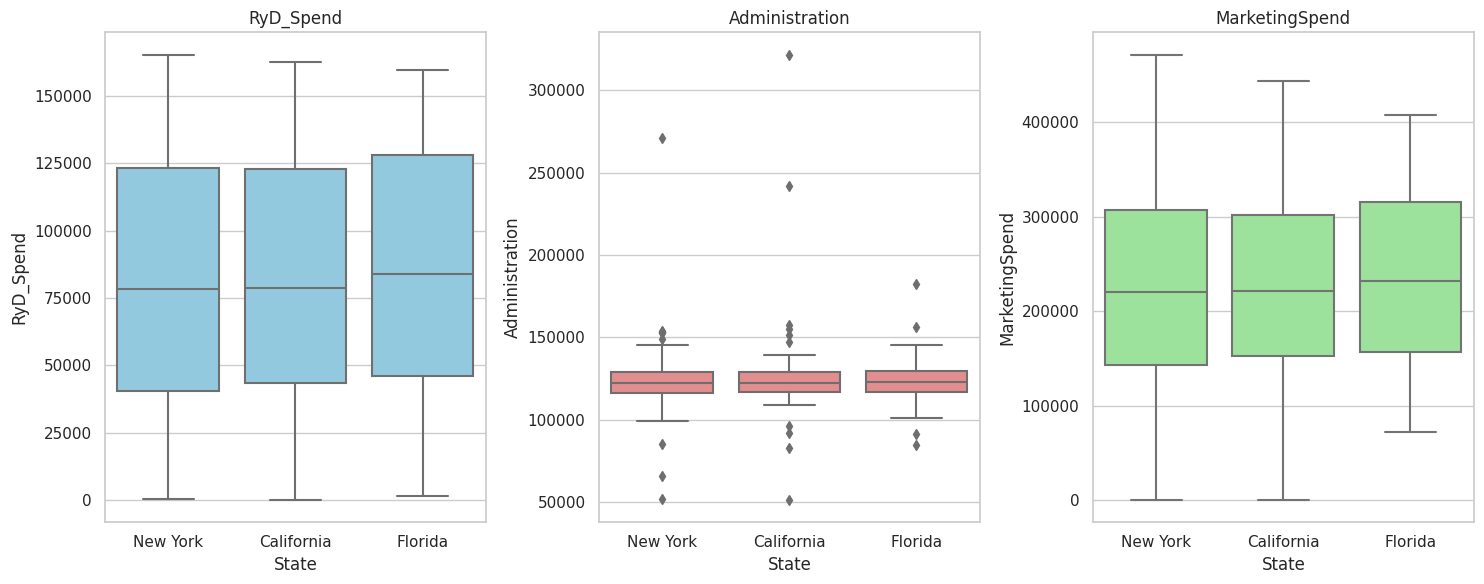

(None, None)

In [18]:
#@title Boxplots

# DataFrame auxiliar con las columnas necesarias
subset_data = data[['State', 'RyD_Spend', 'Administration', 'MarketingSpend']].copy()

# Mapear los valores de estado a valores originales para una mejor presentación
subset_data['State'] = subset_data['State'].map({-1: 'California', 0: 'Florida', 1: 'New York'})

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Definir colores para cada atributo
colors = {"RyD_Spend": 'skyblue', "Administration": 'lightcoral', "MarketingSpend": 'lightgreen'}

# Crear los boxplots
for i, attribute in enumerate(['RyD_Spend', 'Administration', 'MarketingSpend']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='State', y=attribute, data=subset_data, color=colors[attribute])
    plt.title(attribute)

plt.tight_layout(), plt.show()

## Estandarización

In [19]:
df = data.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   int64  
 4   Profit          1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [21]:
#@title Estandarización Z-score de las columnas numéricas
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df.columns)
df_std['State'] = df['State'] # Mantiene valores originales enteros
df_std

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,1.799023,1.105197,2.682968,1,1.696301
1,1.739869,2.253692,2.378316,-1,1.685343
2,1.543022,-1.730568,1.985407,0,1.668041
3,1.348048,-0.340433,1.715177,1,1.477956
4,1.299351,-2.504210,1.529110,0,1.088053
...,...,...,...,...,...
995,-0.591946,-0.357871,-0.578727,-1,-0.566079
996,1.145907,0.589023,1.125271,-1,1.044865
997,0.400018,9.435756,0.010245,-1,6.867965
998,1.005869,15.759379,0.606202,-1,5.001869


## Detección y filtrado de Outliers


In [22]:
df_std.describe().round(3)

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,1000.000,1000.000,1000.000,1000.000,1000.000
mean,-0.000,0.000,0.000,-0.010,-0.000
std,1.001,1.001,1.001,0.824,1.001
min,-1.756,-5.686,-2.471,-1.000,-2.446
25%,-0.830,-0.502,-0.822,-1.000,-0.784
50%,-0.037,-0.043,-0.018,0.000,-0.044
75%,0.922,0.490,0.896,1.000,0.841
max,1.799,15.759,2.683,1.000,8.327


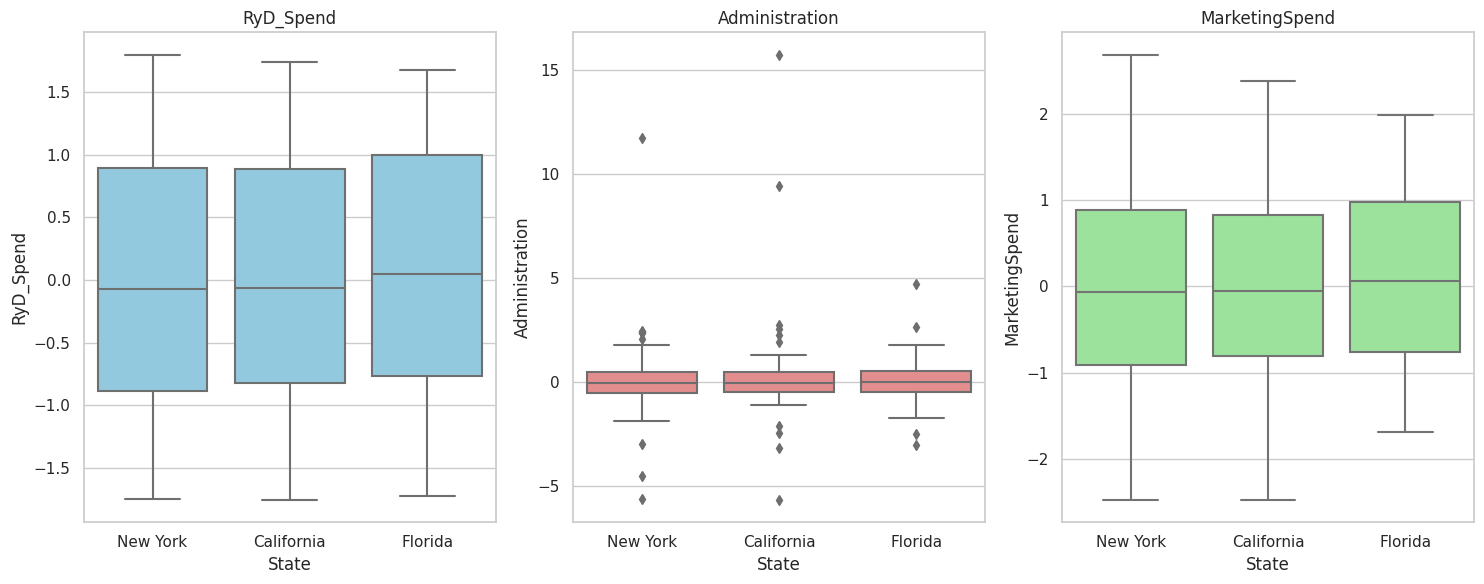

(None, None)

In [23]:
#@title Boxplots estandarizados

# DataFrame auxiliar con las columnas necesarias
subset_data = df_std[['State', 'RyD_Spend', 'Administration', 'MarketingSpend']].copy()

# Mapear los valores de estado a valores originales para una mejor presentación
subset_data['State'] = subset_data['State'].map({-1: 'California', 0: 'Florida', 1: 'New York'})

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Definir colores para cada atributo
colors = {"RyD_Spend": 'skyblue', "Administration": 'lightcoral', "MarketingSpend": 'lightgreen'}

# Crear los boxplots
for i, attribute in enumerate(['RyD_Spend', 'Administration', 'MarketingSpend']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='State', y=attribute, data=subset_data, color=colors[attribute])
    plt.title(attribute)

plt.tight_layout(), plt.show()

In [24]:
# Eliminación de Outliers
df_std = df_std[(df_std['Administration']<1.9)&(df_std['Administration']>-2.0)]

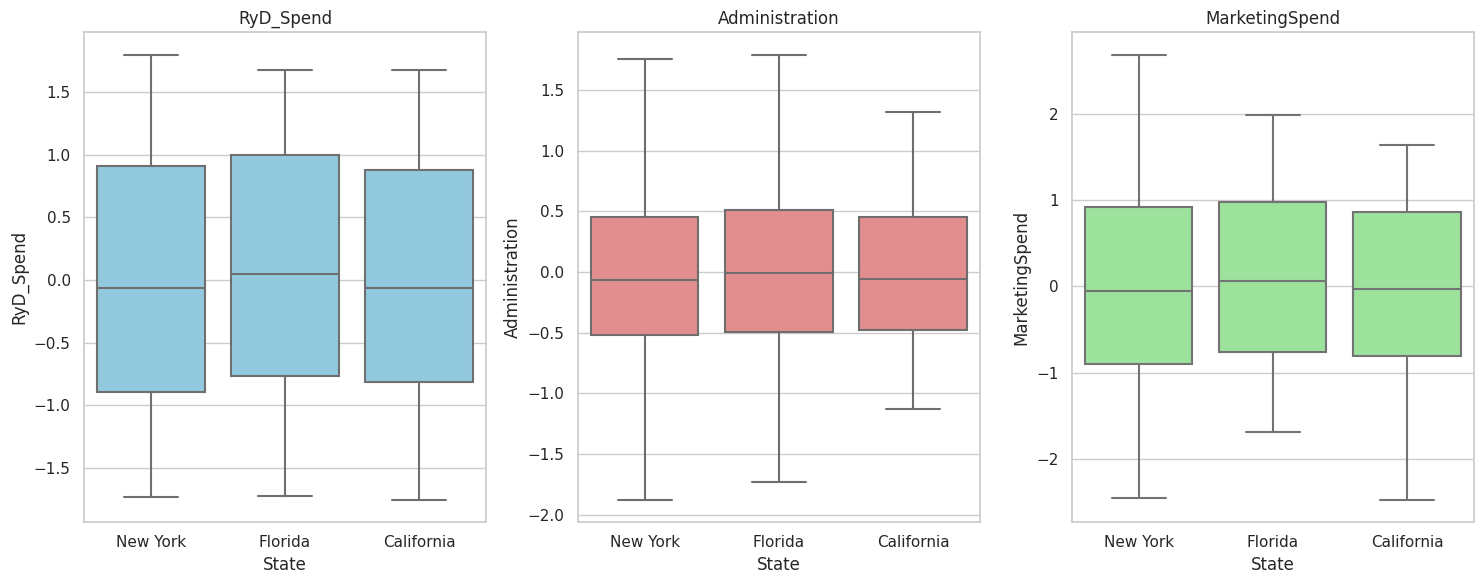

(None, None)

In [25]:
#@title Boxplots estandarizado

# DataFrame auxiliar con las columnas necesarias
subset_data = df_std[['State', 'RyD_Spend', 'Administration', 'MarketingSpend']].copy()

# Mapear los valores de estado a valores originales para una mejor presentación
subset_data['State'] = subset_data['State'].map({-1: 'California', 0: 'Florida', 1: 'New York'})

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Definir colores para cada atributo
colors = {"RyD_Spend": 'skyblue', "Administration": 'lightcoral', "MarketingSpend": 'lightgreen'}

# Crear los boxplots
for i, attribute in enumerate(['RyD_Spend', 'Administration', 'MarketingSpend']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='State', y=attribute, data=subset_data, color=colors[attribute])
    plt.title(attribute)

plt.tight_layout(), plt.show()

## Correlaciones entre atributos

In [26]:
corr = df_std.corr()
# corr = df_std.drop(['State'], axis=1).corr()
corr

,RyD_Spend,Administration,MarketingSpend,State,Profit
RyD_Spend,1.000000,0.927933,0.988333,0.000762,0.999008
Administration,0.927933,1.000000,0.905918,-0.009796,0.925906
MarketingSpend,0.988333,0.905918,1.000000,0.003698,0.988449
State,0.000762,-0.009796,0.003698,1.000000,0.001330
Profit,0.999008,0.925906,0.988449,0.001330,1.000000


### Matriz de correlación

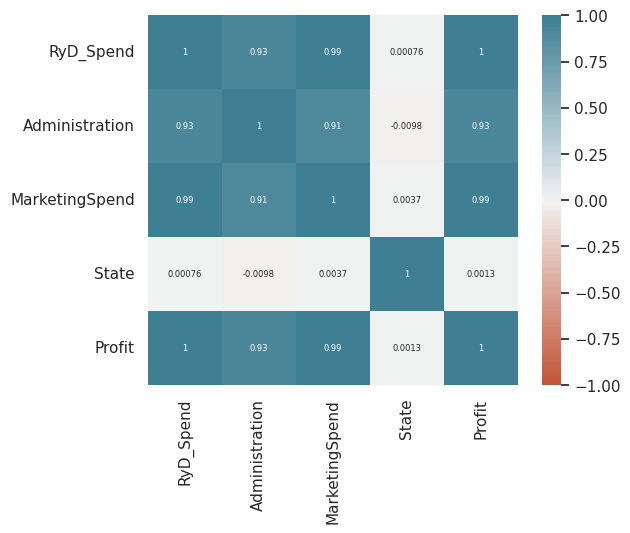

In [27]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

# Árbol de Regresión

## Preparación de los conjuntos (con 2 conjuntos de prueba)

In [28]:
X = df_std.drop(['Profit'], axis=1) # 'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
y = df_std['Profit']

In [29]:
# Dividir el conjunto de prueba en dos conjuntos: test1 y test2 - (70% - 15% - 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)
X_test, X_test2, y_test, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [30]:
feature_list = list(X_train.columns)
feature_list

['RyD_Spend', 'Administration', 'MarketingSpend', 'State']

## Aplicación de la técnica

In [31]:
clf = tree.DecisionTreeRegressor()

In [41]:
# Mejores hiperparámetros obtenidos en la optimización posterior
mejores_hiperparametros = {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 123}
clf = tree.DecisionTreeRegressor(**mejores_hiperparametros)

In [42]:
regressor_tree = clf.fit(X_train, y_train)
predictions1 = clf.predict(X_test)
predictions2 = clf.predict(X_test2)

In [43]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.03
|   |--- RyD_Spend <= -0.90
|   |   |--- RyD_Spend <= -1.32
|   |   |   |--- RyD_Spend <= -1.54
|   |   |   |   |--- Administration <= -0.72
|   |   |   |   |   |--- RyD_Spend <= -1.63
|   |   |   |   |   |   |--- RyD_Spend <= -1.69
|   |   |   |   |   |   |   |--- RyD_Spend <= -1.71
|   |   |   |   |   |   |   |   |--- value: [-1.62]
|   |   |   |   |   |   |   |--- RyD_Spend >  -1.71
|   |   |   |   |   |   |   |   |--- Administration <= -0.96
|   |   |   |   |   |   |   |   |   |--- value: [-1.60]
|   |   |   |   |   |   |   |   |--- Administration >  -0.96
|   |   |   |   |   |   |   |   |   |--- value: [-1.59]
|   |   |   |   |   |   |--- RyD_Spend >  -1.69
|   |   |   |   |   |   |   |--- RyD_Spend <= -1.66
|   |   |   |   |   |   |   |   |--- Administration <= -0.95
|   |   |   |   |   |   |   |   |   |--- value: [-1.57]
|   |   |   |   |   |   |   |   |--- Administration >  -0.95
|   |   |   |   |   |   |   |   |   |--- value: [-1.56]
|   |   |   |   |   

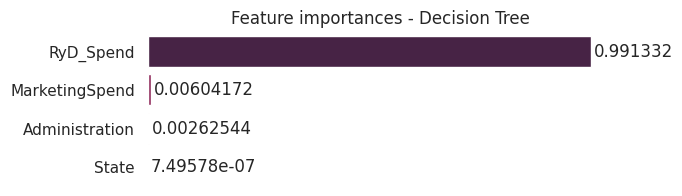

In [44]:
#@title Importancia de las características

# Características y sus importancias -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': regressor_tree.feature_importances_ })
# Ordenamiento por importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
plt.figure(figsize=(6,2))
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

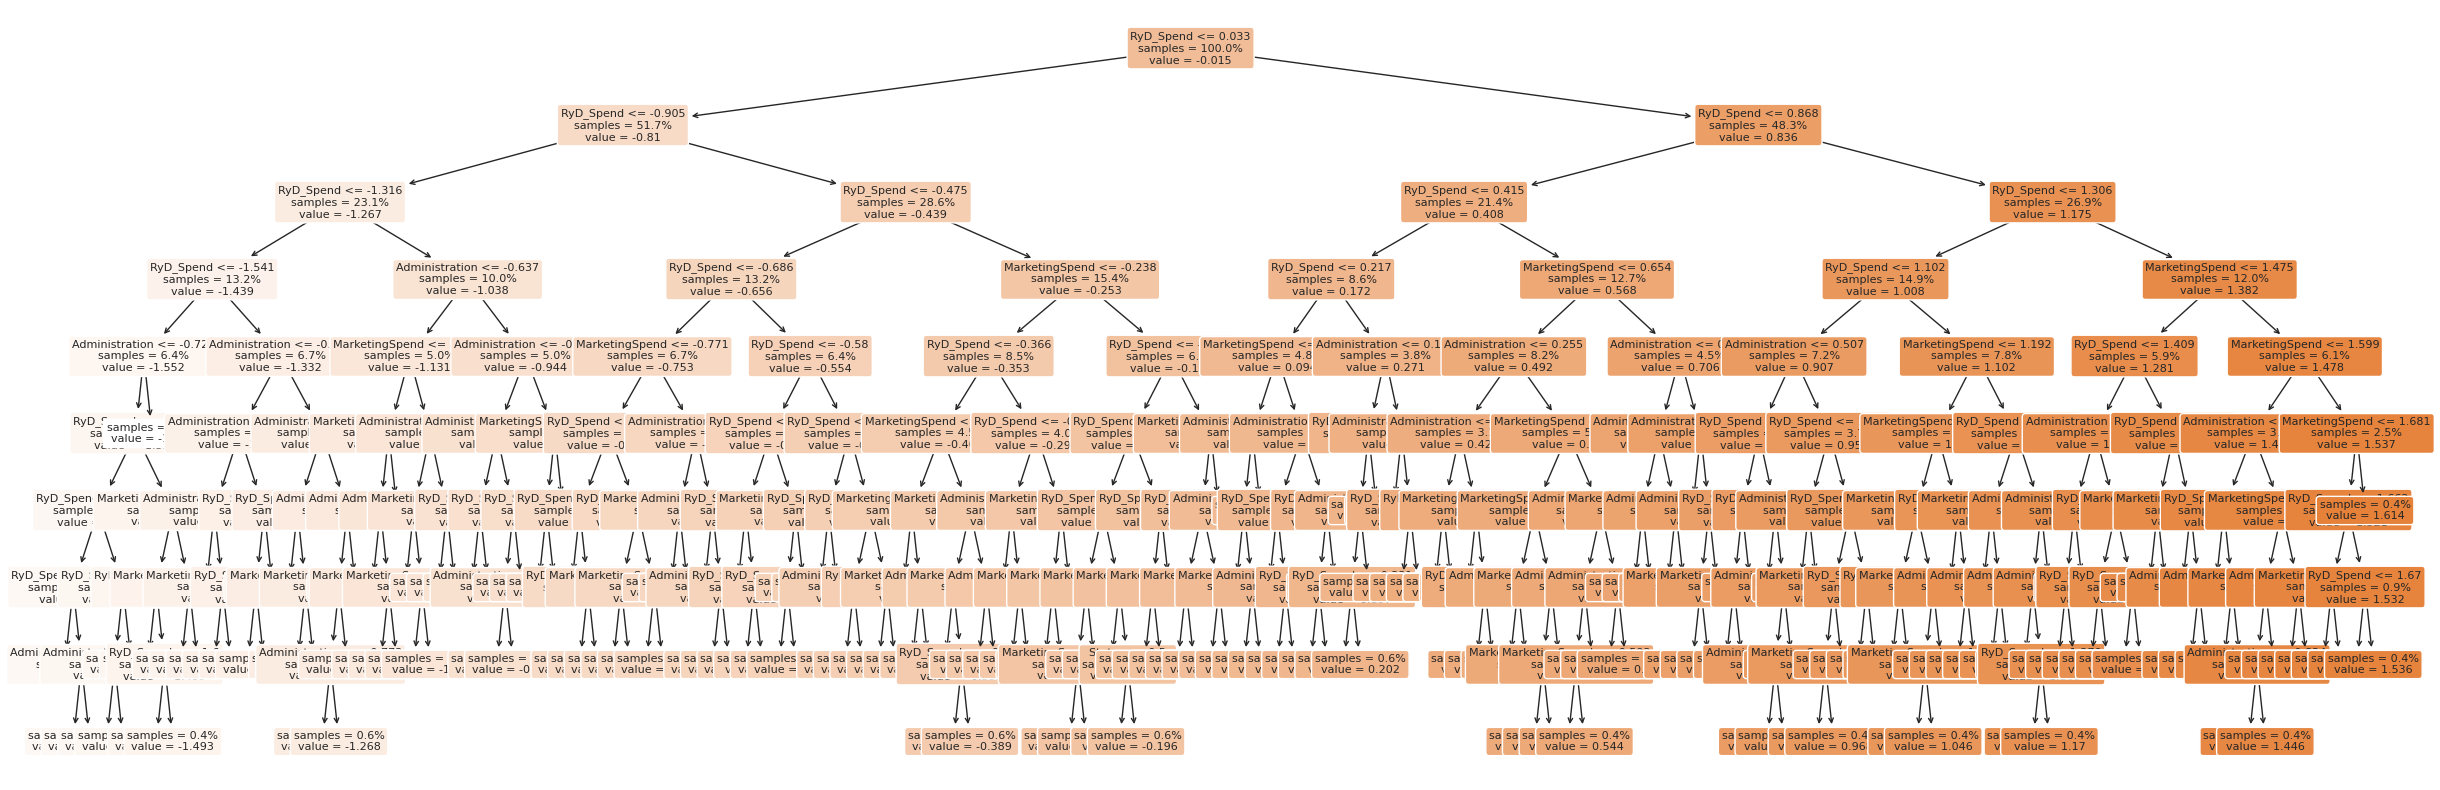

In [36]:
#@title Árbol de Regresión
features = feature_list

plt.figure(figsize=(30,10))
tree.plot_tree(regressor_tree,
               feature_names=features,
               filled=True,
               rounded=True,
               fontsize=8,
               proportion=True,  # Proporción de la muestra en cada nodo
               impurity=False,   # No mostrar medida de impureza en cada nodo
               class_names=['Profit'],  # Nombre de la clase (en este caso, 'Profit')
               max_depth=None  # Limita la profundidad del árbol - None o entero
               )
plt.show()

## Optimización de Hiperparámetros

In [45]:
#@title Ramdom Search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20], # Profundidad máxima
    'min_samples_split': [2, 3, 4, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 3, 4, 5], # Número mínimo de muestras requeridas en una hoja
    'random_state': [123]
}
# Búsqueda de hiperparámetros con RandomSearchCV (cv=5)
# La métrica de puntuación es el error cuadrático medio negativo (scoring='neg_mean_squared_error')
# ya que el objetivo es minimizar el MSE.
random_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria
print("Mejores hiperparámetros:", best_params)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred2 = best_model.predict(X_test2)

# Calcula el error cuadrático medio (MSE)
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test2, y_pred2)
print("Error cuadrático medio (MSE) en el conjunto de prueba1:", mse1)
print("Error cuadrático medio (MSE) en el conjunto de prueba2:", mse2)

Mejores hiperparámetros: {'random_state': 123, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Error cuadrático medio (MSE) en el conjunto de prueba1: 0.0037128314496965445
Error cuadrático medio (MSE) en el conjunto de prueba2: 0.00017918165796729246


In [46]:
#@title Grid Search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20], # Profundidad máxima
    'min_samples_split': [2, 3, 4, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 3, 4, 5], # Número mínimo de muestras requeridas en una hoja
    'random_state': [123]
}
# Búsqueda de hiperparámetros con GridSearchCV (cv=5)
# La métrica de puntuación es el error cuadrático medio negativo (scoring='neg_mean_squared_error')
# ya que el objetivo es minimizar el MSE.
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred2 = best_model.predict(X_test2)

# Calcula el error cuadrático medio (MSE)
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test2, y_pred2)
print("Error cuadrático medio (MSE) en el conjunto de prueba1:", mse1)
print("Error cuadrático medio (MSE) en el conjunto de prueba2:", mse2)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 123}
Error cuadrático medio (MSE) en el conjunto de prueba1: 0.004170716362996277
Error cuadrático medio (MSE) en el conjunto de prueba2: 7.71299378909473e-05


## Métricas

In [47]:
#@title Conjunto de Pruebas 1
y_test = y_test.astype(float)

mae = mean_absolute_error(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions1) # medida de la bondad de ajuste del modelo

# Error absoluto porcentual (APE) para cada predicción y el MAPE promediando estos errores.
mape = np.mean(np.abs((y_test - predictions1) / y_test) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores

# Imprimir MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)

Mean Absolute Percentage Error (MAPE): 6.075306861878062
Mean Absolute Error (MAE): 0.010592694812656376
Mean Squared Error (MSE): 0.0007334360220517813
Root Mean Squared Error (RMSE): 0.027082023965202106
R-squared (R2): 0.9991030006877439
R-squared adjusted (R2 ajustado): 0.9990777331014832


In [48]:
#@title Conjunto de Pruebas 2
y_test2 = y_test2.astype(float)

mae_2 = mean_absolute_error(y_test2, predictions2)
mse_2 = mean_squared_error(y_test2, predictions2)
rmse_2 = np.sqrt(mse)
r2_2 = r2_score(y_test2, predictions2) # medida de la bondad de ajuste del modelo

# Error absoluto porcentual (APE) para cada predicción y el MAPE promediando estos errores.
mape_2 = np.mean(np.abs((y_test2 - predictions2) / y_test2) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test2)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted_2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores

# Imprimir MAPE
print("Mean Absolute Percentage Error (MAPE):", mape_2)
print("Mean Absolute Error (MAE):", mae_2)
print("Mean Squared Error (MSE):", mse_2)
print("Root Mean Squared Error (RMSE):", rmse_2)
print("R-squared (R2):", r2_2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted_2)

Mean Absolute Percentage Error (MAPE): 7.464346323825128
Mean Absolute Error (MAE): 0.006603167555534418
Mean Squared Error (MSE): 0.00015123884722432798
Root Mean Squared Error (RMSE): 0.027082023965202106
R-squared (R2): 0.9998076334049499
R-squared adjusted (R2 ajustado): 0.9990777331014832


In [49]:
# Diccionario con las métricas
metricas_dict = {
    'Conj. Prueba 1': [mae, mse, rmse, r2, r2_adjusted, mape],
    'Conj. Prueba 2': [mae_2, mse_2, rmse_2, r2_2, r2_adjusted_2, mape_2]
}

# DataFrame a partir del diccionario
metricas_df = pd.DataFrame(metricas_dict, index=['MAE', 'MSE', 'RMSE', 'R2', 'R2_adj', 'MAPE'])
metricas_df

,Conj. Prueba 1,Conj. Prueba 2
MAE,0.010593,0.006603
MSE,0.000733,0.000151
RMSE,0.027082,0.027082
R2,0.999103,0.999808
R2_adj,0.999078,0.999078
MAPE,6.075307,7.464346


## Predicciones

In [50]:
# Tabla de resultados para ver las predicciones
tableResult = pd.DataFrame({'Prueba_1': y_test, 'Predicc_1': predictions1})
tableResult.sample(10)

,Prueba_1,Predicc_1
467,0.599397,0.586676
115,0.812057,0.811499
401,1.425047,1.427532
573,-1.007063,-1.016858
591,0.191933,0.190133
686,-0.442221,-0.442866
388,-1.282379,-1.275452
105,-0.754127,-0.755936
404,0.142071,0.145831
986,0.356027,0.357402


In [51]:
# Tabla de resultados para ver las predicciones
tableResult = pd.DataFrame({'Prueba_2': y_test2, 'Predicc_2': predictions2})
tableResult.sample(10)

,Prueba_2,Predicc_2
600,-1.583364,-1.589487
597,-1.446433,-1.457100
766,1.044726,1.045855
938,-0.651374,-0.648823
368,0.804425,0.799296
263,-0.222148,-0.222533
821,-0.518010,-0.530887
450,-0.520382,-0.530887
684,0.589253,0.586676
830,0.929458,0.932953


# Conclusiones y observaciones finales

En este análisis se pretende la estimación del atributo "Profit" mediante la aplicación de árboles de decisión en un contexto de regresión. Durante el proceso, exploramos la influencia de hiperparámetros clave, como la máxima profundidad del árbol, el número mínimo de observaciones por hoja, el número mínimo de observaciones requeridas para realizar una separación y el criterio de separación.

Se evaluó el rendimiento del modelo utilizando dos conjuntos de prueba y consideramos métricas fundamentales en problemas de regresión, tales como la precisión, exhaustividad y exactitud. Estas métricas permiten cuantificar la capacidad predictiva del modelo en relación con los valores reales de "Profit".

Durante el desarrollo de este trabajo, se llevaron a cabo procesos clave, como el análisis exploratorio de los datos, la estandarización, el filtrado de outliers y la optimización de hiperparámetros mediante técnicas como Random Search y Grid Search.





